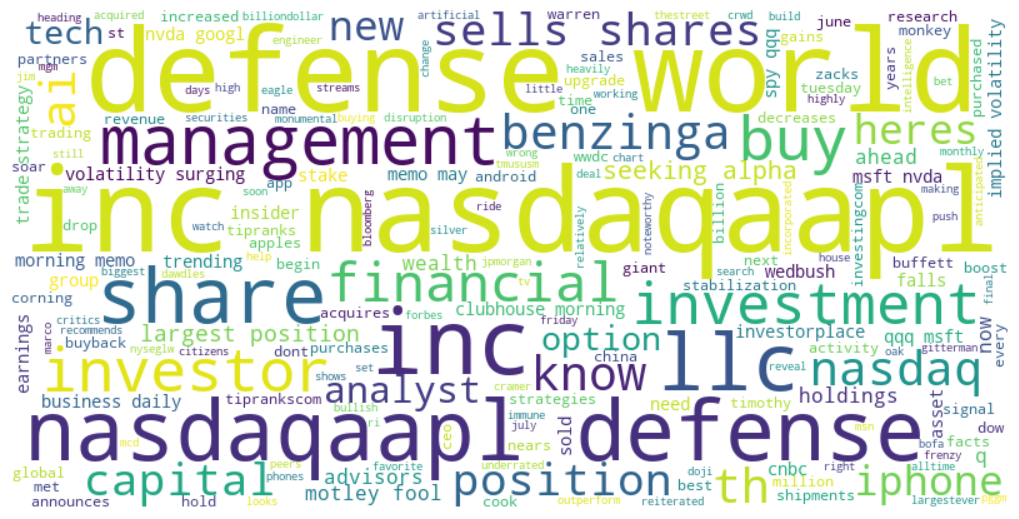

In [13]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
import streamlit as st
import re
from PIL import Image

# Google News RSS를 사용하여 AAPL 관련 뉴스 가져오기
def get_news_rss(query='AAPL'):
    url = f'https://news.google.com/rss/search?q={query}'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'xml')
    headlines = soup.find_all('title')
    news_texts = [headline.get_text() for headline in headlines[2:]]  # 첫 두 개는 불필요한 텍스트이므로 제외
    return news_texts

# 뉴스 텍스트 전처리 및 불용어 제거
def preprocess_text(texts, stopwords):
    text = ' '.join(texts)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    text_words = text.split()
    text_words = [word for word in text_words if word not in stopwords]
    return ' '.join(text_words)

# 불용어 리스트 생성
stopwords = set(
    ['yahoo', 'finance', 'apple', 'aapl', 'yahoo finance', 'stock', 'stocks', 'market','AAPL','Apple']
)

# Streamlit 앱 실행
st.title("AAPL 관련 뉴스 워드클라우드")

news_texts = get_news_rss(query='AAPL')

if not news_texts:
    st.write("뉴스를 가져올 수 없습니다. 다른 방법을 시도해보세요.")
else:
    news_texts_processed = preprocess_text(news_texts, stopwords)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(news_texts_processed)
    
    # 워드클라우드를 이미지로 변환
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    
    # 이미지 저장
    plt.savefig('wordcloud.png', format='png')
    
    # Plotly 이미지 불러오기
    img = Image.open('wordcloud.png')
    fig = px.imshow(img)
    fig.update_layout(coloraxis_showscale=False)
    fig.update_xaxes(showticklabels=False)
    fig.update_yaxes(showticklabels=False)
    
    # Streamlit에 워드클라우드 표시
    #st.plotly_chart(fig, use_container_width=True)
